In [2]:
#mount google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import zipfile
import os

# Path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/ChestXray_pneumonia_dataset_Vishnu.zip'
extract_path = '/content/chest_xray_dataset/Data'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [6]:
#Data Preprocessing

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to the dataset directories
train_dir = os.path.join(extract_path, 'train')
val_dir = os.path.join(extract_path, 'val')
test_dir = os.path.join(extract_path, 'test')

# Image data generator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Image data generator for validation and test data without augmentation
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Load validation data
val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

# Load test data
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)


Found 4211 images belonging to 2 classes.
Found 3452 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Model Development

In [7]:
#Model 1: Basic CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Build the basic CNN model
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_1.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 246016)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     125,960,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,980,609 (480.58 MB)

 Trainable params: 125,980,609 (480.58 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
#Model 2: Complex CNN

# Build the complex CNN model
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,079,553 (99.49 MB)

 Trainable params: 26,079,553 (99.49 MB)

 Non-trainable params: 0 (0.00 B)

Model Training

Train models using the training and validation data.

In [9]:
# Train the basic CNN model
history_1 = model_1.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=5
)




Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 889s 7s/step - accuracy: 0.8201 - loss: 1.2565 - val_accuracy: 0.9547 - val_loss: 0.1402
Epoch 2/5
  1/131 ━━━━━━━━━━━━━━━━━━━━ 13:50 6s/step - accuracy: 0.9062 - loss: 0.2099

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


131/131 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9062 - loss: 0.2099 - val_accuracy: 0.9643 - val_loss: 0.1662
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 906s 7s/step - accuracy: 0.9204 - loss: 0.2002 - val_accuracy: 0.9533 - val_loss: 0.1129
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.9062 - loss: 0.3484 - val_accuracy: 0.8929 - val_loss: 0.2009
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 883s 7s/step - accuracy: 0.9427 - loss: 0.1579 - val_accuracy: 0.9585 - val_loss: 0.1020


In [10]:
# Train the complex CNN model
history_2 = model_2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=5
)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 938s 7s/step - accuracy: 0.8388 - loss: 0.4505 - val_accuracy: 0.9057 - val_loss: 0.2068
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8438 - loss: 0.2959 - val_accuracy: 0.7500 - val_loss: 0.4009
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 932s 7s/step - accuracy: 0.9187 - loss: 0.1978 - val_accuracy: 0.9571 - val_loss: 0.1127
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9688 - loss: 0.0990 - val_accuracy: 1.0000 - val_loss: 0.0758
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 984s 7s/step - accuracy: 0.9402 - loss: 0.1537 - val_accuracy: 0.9612 - val_loss: 0.1096


Evaluate all models on the test set and visualize the training process.

In [11]:
# Evaluate the basic CNN model
test_loss_1, test_accuracy_1 = model_1.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Basic CNN - Test accuracy: {test_accuracy_1:.4f}, Test loss: {test_loss_1:.4f}')

# Evaluate the complex CNN model
test_loss_2, test_accuracy_2 = model_2.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Complex CNN - Test accuracy: {test_accuracy_2:.4f}, Test loss: {test_loss_2:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7261 - loss: 0.6512
Basic CNN - Test accuracy: 0.7155, Test loss: 0.6817
19/19 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.7736 - loss: 0.6259
Complex CNN - Test accuracy: 0.7829, Test loss: 0.5715


In [12]:
#Model 3: Transfer Learning with MobileNetV2 Pretrained on ImageNet

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D

# Load the MobileNetV2 model without the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(256, 256, 3)))

# Build the model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model_3 = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of MobileNetV2
for layer in base_model.layers:
    layer.trainable = False

model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_3.summary()


<ipython-input-12-0f7d08ac8e48>:8: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(256, 256, 3)))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 128, 128, 32)   │            864 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 128, 128, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 128, 128, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 128, 128, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 128, 128, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 128, 128, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 128, 128, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 128, 128, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 128, 128, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 128, 128, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 129, 129, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 64, 64, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,914,369 (11.12 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [13]:
# Train the transfer learning model with MobileNetV2
history_3 = model_3.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=5
)

Epoch 1/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 467s 3s/step - accuracy: 0.8880 - loss: 0.3043 - val_accuracy: 0.9650 - val_loss: 0.0871
Epoch 2/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9688 - loss: 0.0790 - val_accuracy: 1.0000 - val_loss: 0.0163
Epoch 3/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - accuracy: 0.9411 - loss: 0.1412 - val_accuracy: 0.9725 - val_loss: 0.0756
Epoch 4/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9688 - loss: 0.0688 - val_accuracy: 0.9286 - val_loss: 0.1447
Epoch 5/5
131/131 ━━━━━━━━━━━━━━━━━━━━ 494s 3s/step - accuracy: 0.9496 - loss: 0.1254 - val_accuracy: 0.9667 - val_loss: 0.0845


In [14]:
# Evaluate the transfer learning model with MobileNetV2
test_loss_3, test_accuracy_3 = model_3.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'MobileNetV2 Transfer Learning - Test accuracy: {test_accuracy_3:.4f}, Test loss: {test_loss_3:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8024 - loss: 0.4871
MobileNetV2 Transfer Learning - Test accuracy: 0.8026, Test loss: 0.5071


Plot Training & Validation Accuracy for Basic CNN, Complex CNN, and MobileNetV2

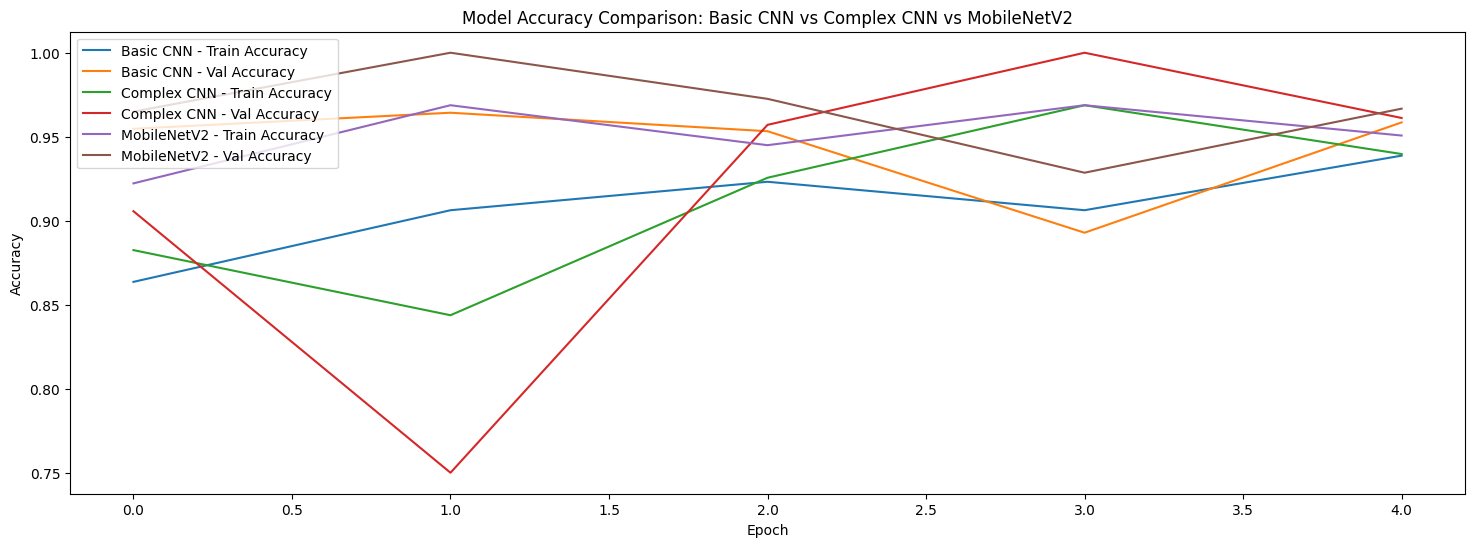

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for basic CNN, complex CNN, and MobileNetV2 models
plt.figure(figsize=(18, 6))

# Basic CNN accuracy
plt.plot(history_1.history['accuracy'], label='Basic CNN - Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Basic CNN - Val Accuracy')

# Complex CNN accuracy
plt.plot(history_2.history['accuracy'], label='Complex CNN - Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Complex CNN - Val Accuracy')

# MobileNetV2 accuracy
plt.plot(history_3.history['accuracy'], label='MobileNetV2 - Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='MobileNetV2 - Val Accuracy')

plt.title('Model Accuracy Comparison: Basic CNN vs Complex CNN vs MobileNetV2')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


Plot Training & Validation Loss for Basic CNN, Complex CNN, and MobileNetV2

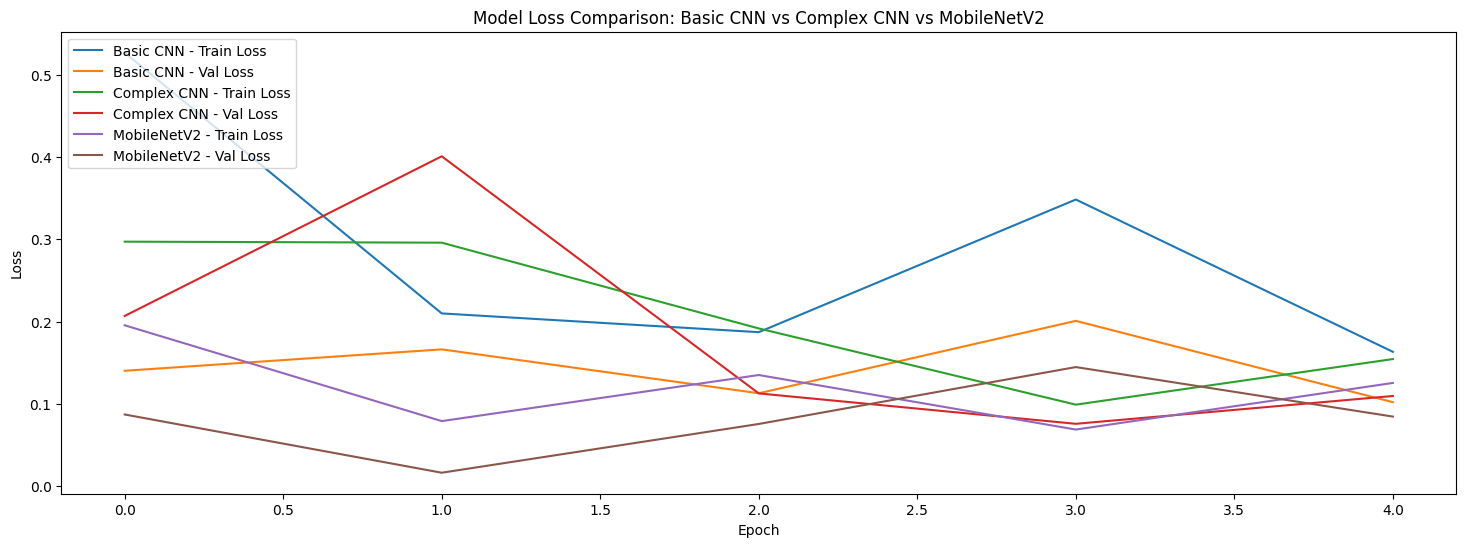

In [16]:
# Plot training & validation loss values for basic CNN, complex CNN, and MobileNetV2 models
plt.figure(figsize=(18, 6))

# Basic CNN loss
plt.plot(history_1.history['loss'], label='Basic CNN - Train Loss')
plt.plot(history_1.history['val_loss'], label='Basic CNN - Val Loss')

# Complex CNN loss
plt.plot(history_2.history['loss'], label='Complex CNN - Train Loss')
plt.plot(history_2.history['val_loss'], label='Complex CNN - Val Loss')

# MobileNetV2 loss
plt.plot(history_3.history['loss'], label='MobileNetV2 - Train Loss')
plt.plot(history_3.history['val_loss'], label='MobileNetV2 - Val Loss')

plt.title('Model Loss Comparison: Basic CNN vs Complex CNN vs MobileNetV2')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


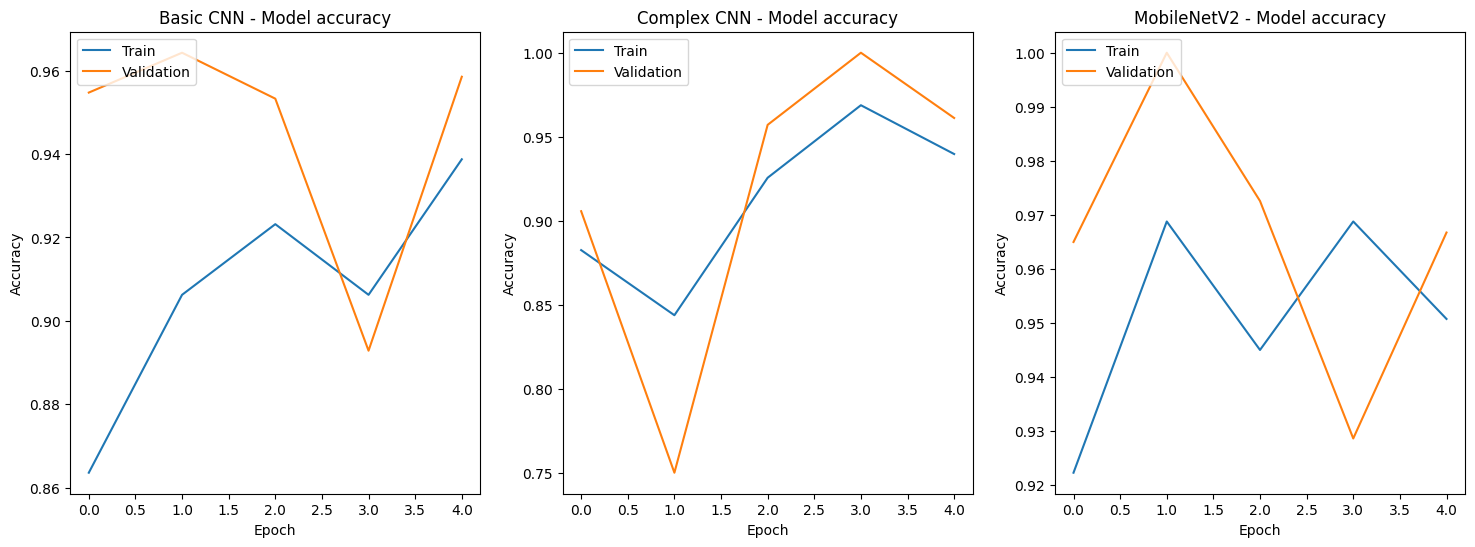

In [18]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for all models
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Basic CNN - Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Complex CNN - Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('MobileNetV2 - Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

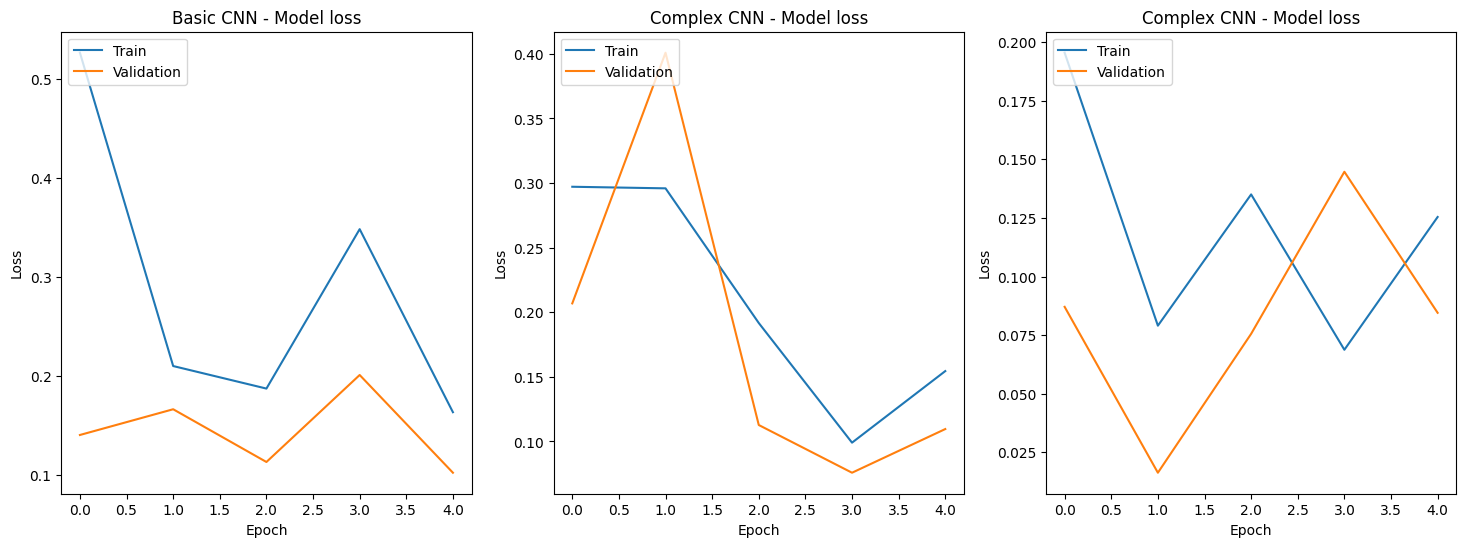

In [19]:
# Plot training & validation loss values for all models
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Basic CNN - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Complex CNN - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 3, 3)
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Complex CNN - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()